#### PyTorch 기반의 주요 Object Detection/Segmentation 
* torchvision 
    - Code 기반으로, 지원 알고리즘이 많지 않다 
* Detectron2 
    - Config 기반으로, Facebook Reseach에서 주도 
* MMDetection
    - Config 기반으로, 중국 칭화대학 중심의 OpenMMLab 주도 




#### MMDetection 
1. Architecture 
    - Backbone
        - Feature Extractor(image -> Feature Map) 
    - Neck 
        - Backbone과 Geads를 연결하면서 Heads가 feature map의 특성을 보다 잘 해석하고 처리할 수 있도록 정제 작업 수행 
    - DenseHead 
        -  AnchorHead/AnchorFreeHead
        -  Feature Map에서 object의 위치와 classification을 처리하는 부분 
    - ROIExtractor 
        - Feature Map에서 ROI 정보를 뽑아내는 부분 
    - ROIHead(BBoxHead/MaskHead) 
        - ROI정보를 기반으로 Object 위치와 Classification을 수행하는 부분 

In [1]:
import torch 
import os 
import sys 

In [2]:
print(torch.__version__)
print(sys.version)

1.11.0+cu113
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [3]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 47.1 MB 367 kB/s 
     |████████████████████████████████| 190 kB 29.8 MB/s 


In [4]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 24992, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 24992 (delta 11), reused 18 (delta 6), pack-reused 24961
Receiving objects: 100% (24992/24992), 37.79 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (17504/17504), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/version.py -> build/lib/mmdet
c

In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
!cd mmdetection; mkdir checkpoints

In [5]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-07-04 01:32:36--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.77
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.3MB/s    in 14s     

2022-07-04 01:32:50 (11.4 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [6]:
!ls -lia /content/mmdetection/checkpoints

total 163376
3407983 drwxr-xr-x  2 root root      4096 Jul  4 01:32 .
3276802 drwxr-xr-x 19 root root      4096 Jul  4 01:28 ..
3407984 -rw-r--r--  1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [7]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [8]:
from mmdet.apis import init_detector, inference_detector

model = init_detector(config_file, checkpoint_file, device="cuda:0")

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [10]:
!pwd
%cd mmdetection

/content
/content/mmdetection


In [11]:
from mmdet.apis import init_detector, inference_detector
model = init_detector(config='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py', checkpoint='checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth')

load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [12]:
%cd /content

/content


In [13]:
!pwd

/content


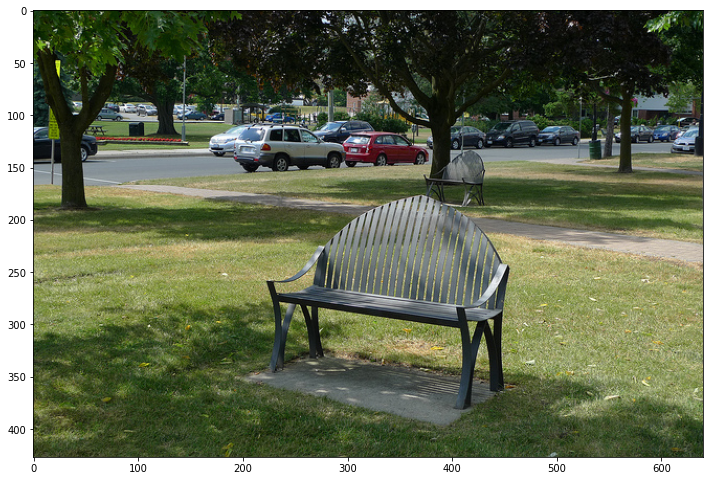

In [17]:
import cv2 
import matplotlib.pyplot as plt 

image = "/content/mmdetection/demo/demo.jpg"
image_array = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(image_array)

In [18]:
results = inference_detector(model, image_array)

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [24]:
type(results),  len(results)

(list, 80)

In [25]:
results

[array([[5.32313049e+02, 1.09262283e+02, 5.41063721e+02, 1.25051643e+02,
         3.45633656e-01],
        [3.75521698e+02, 1.19338791e+02, 3.81920197e+02, 1.34137665e+02,
         2.85949230e-01],
        [2.54894226e+02, 1.04486702e+02, 2.63918854e+02, 1.13957321e+02,
         2.71512359e-01],
        [5.33662659e+02, 1.08480553e+02, 5.45711792e+02, 1.23409607e+02,
         1.53505519e-01],
        [3.61386688e+02, 1.09186554e+02, 3.68708099e+02, 1.22881927e+02,
         8.68823007e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[4.80735596e+02, 1.10353592e+02, 5.21965637e+02, 1.30220657e+02,
         9.86359417e-01],
        [2.94878662e+02, 1.16319992e+02, 3.78206573e+02, 1.50559387e+02,
         9.82577622e-01],
        [6.09602417e+02, 1.12572838e+02, 6.34637573e+02, 1.36877197e+02,
         9.80639637e-01],
        [0.00000000e+00, 1.10628242e+02, 6.21664200e+01, 1.43955811e+02,
         9.68437195e-01],
        [4.30679199e+02, 1.05773315e+02, 4.84210999

In [26]:
results[0].shape

(5, 5)

In [36]:
len(results[0])
results[0]

array([[5.32313049e+02, 1.09262283e+02, 5.41063721e+02, 1.25051643e+02,
        3.45633656e-01],
       [3.75521698e+02, 1.19338791e+02, 3.81920197e+02, 1.34137665e+02,
        2.85949230e-01],
       [2.54894226e+02, 1.04486702e+02, 2.63918854e+02, 1.13957321e+02,
        2.71512359e-01],
       [5.33662659e+02, 1.08480553e+02, 5.45711792e+02, 1.23409607e+02,
        1.53505519e-01],
       [3.61386688e+02, 1.09186554e+02, 3.68708099e+02, 1.22881927e+02,
        8.68823007e-02]], dtype=float32)

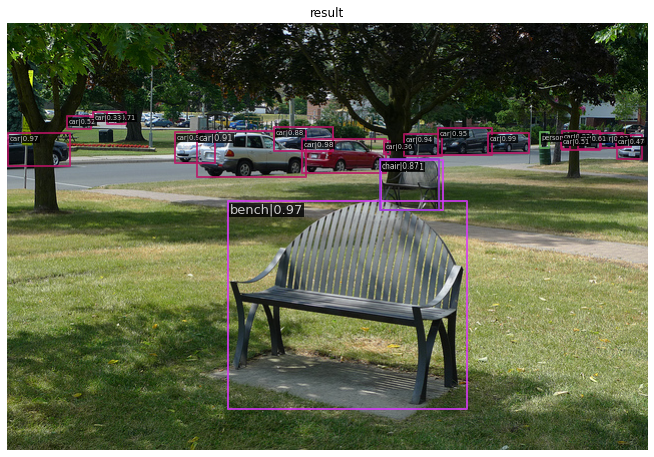

In [40]:
from mmdet.apis import show_result_pyplot
show_result_pyplot(model, image, results)